## AutoEncoder assignment  
5833638023 - Nivit Nantanivattikul  
ref. - https://gist.github.com/naotokui/b9fb93b8dba534b55a140e8c88ce07f5

### Loading Dataset  
normalize the value into (0,1) then flatten it from 28x28 pixels to vector(784).

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255. 
x_test = x_test.astype('float32')/255. 

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)

Using TensorFlow backend.


(60000, 784)


### Defining Model
1. 1 hidden layer ; hidden size < input size
2. 1 hidden layer ; hidden size = input size
3. 1 hidden layer ; hidden size 2 times as input size
4. 3 hidden layer ; hidden size = |input|/2, |input|/4, |input|/2 in order.

In [2]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

In [3]:
input_img = Input(shape=(784,))

In [4]:
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.00009, patience=5, verbose=1, mode='auto')
callbacks_list = [earlystop]

In [5]:
# Model1
encoding_dim = 32  
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Model2
encoding_dim2 = 784
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img)
#decoded2 = Dense(784, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img, encoded2)
autoencoder2.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
Total params: 615,440
Trainable params: 615,440
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Model3
encoding_dim3 = 1568
encoded3 = Dense(encoding_dim3, activation='relu')(input_img)
decoded3 = Dense(784, activation='sigmoid')(encoded3)
autoencoder3 = Model(input_img, decoded3)
autoencoder3.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1568)              1230880   
_________________________________________________________________
dense_5 (Dense)              (None, 784)               1230096   
Total params: 2,460,976
Trainable params: 2,460,976
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Model4
encoding_dim4 = 392
encoded4 = Dense(encoding_dim4, activation='relu')(input_img)
encoded4 = Dense(146, activation='relu')(encoded4)
decoded4 = Dense(392, activation='relu')(encoded4)
decoded4 = Dense(784, activation='sigmoid')(decoded4)
autoencoder4 = Model(input_img, decoded4)
autoencoder4.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 146)               57378     
_________________________________________________________________
dense_12 (Dense)             (None, 392)               57624     
_________________________________________________________________
dense_13 (Dense)             (None, 784)               308112    
Total params: 730,834
Trainable params: 730,834
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=60,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks_list,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 5s 89us/step - loss: 0.3584 - acc: 0.7534 - val_loss: 0.2706 - val_acc: 0.7948
Epoch 2/60
60000/60000 [==============================] - 3s 53us/step - loss: 0.2628 - acc: 0.7961 - val_loss: 0.2512 - val_acc: 0.7947
Epoch 3/60
60000/60000 [==============================] - 3s 54us/step - loss: 0.2417 - acc: 0.7963 - val_loss: 0.2296 - val_acc: 0.7957
Epoch 4/60
60000/60000 [==============================] - 3s 53us/step - loss: 0.2224 - acc: 0.7967 - val_loss: 0.2128 - val_acc: 0.7969
Epoch 5/60
60000/60000 [==============================] - 3s 53us/step - loss: 0.2080 - acc: 0.7978 - val_loss: 0.2005 - val_acc: 0.7972
Epoch 6/60
60000/60000 [==============================] - 3s 56us/step - loss: 0.1972 - acc: 0.7992 - val_loss: 0.1913 - val_acc: 0.7999
Epoch 7/60
60000/60000 [==============================] - 3s 53us/step - loss: 0.1887 - acc: 0.8004 - val_loss: 0.1835 - val_acc

In [10]:
autoencoder2.fit(x_train, x_train,
                epochs=60,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks_list,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 6s 94us/step - loss: 0.4103 - acc: 0.7694 - val_loss: 0.3067 - val_acc: 0.8004
Epoch 2/60
60000/60000 [==============================] - 5s 91us/step - loss: 0.2819 - acc: 0.8039 - val_loss: 0.2589 - val_acc: 0.8047
Epoch 3/60
60000/60000 [==============================] - 5s 90us/step - loss: 0.2482 - acc: 0.8066 - val_loss: 0.2347 - val_acc: 0.8065
Epoch 4/60
60000/60000 [==============================] - 5s 90us/step - loss: 0.2285 - acc: 0.8078 - val_loss: 0.2187 - val_acc: 0.8074
Epoch 5/60
60000/60000 [==============================] - 5s 90us/step - loss: 0.2146 - acc: 0.8085 - val_loss: 0.2068 - val_acc: 0.8080
Epoch 6/60
60000/60000 [==============================] - 5s 91us/step - loss: 0.2040 - acc: 0.8091 - val_loss: 0.1974 - val_acc: 0.8084
Epoch 7/60
60000/60000 [==============================] - 5s 90us/step - loss: 0.1955 - acc: 0.8094 - val_loss: 0.1898 - val_acc

In [11]:
autoencoder3.fit(x_train, x_train,
                epochs=60,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks_list,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 13s 213us/step - loss: 0.2950 - acc: 0.7889 - val_loss: 0.2301 - val_acc: 0.8038
Epoch 2/60
60000/60000 [==============================] - 13s 222us/step - loss: 0.2106 - acc: 0.8052 - val_loss: 0.1918 - val_acc: 0.8049
Epoch 3/60
60000/60000 [==============================] - 13s 219us/step - loss: 0.1821 - acc: 0.8064 - val_loss: 0.1707 - val_acc: 0.8062
Epoch 4/60
60000/60000 [==============================] - 13s 219us/step - loss: 0.1651 - acc: 0.8079 - val_loss: 0.1571 - val_acc: 0.8080
Epoch 5/60
60000/60000 [==============================] - 13s 223us/step - loss: 0.1532 - acc: 0.8092 - val_loss: 0.1471 - val_acc: 0.8092
Epoch 6/60
60000/60000 [==============================] - 13s 220us/step - loss: 0.1442 - acc: 0.8102 - val_loss: 0.1389 - val_acc: 0.8098
Epoch 7/60
60000/60000 [==============================] - 13s 221us/step - loss: 0.1370 - acc: 0.8110 - val_loss: 0.

In [44]:
autoencoder4.fit(x_train, x_train,
                epochs=60,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks_list,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 7s 113us/step - loss: 0.3087 - acc: 0.7710 - val_loss: 0.2497 - val_acc: 0.7928
Epoch 2/60
60000/60000 [==============================] - 6s 108us/step - loss: 0.2261 - acc: 0.7964 - val_loss: 0.2041 - val_acc: 0.7965
Epoch 3/60
60000/60000 [==============================] - 6s 106us/step - loss: 0.1909 - acc: 0.7996 - val_loss: 0.1772 - val_acc: 0.8001
Epoch 4/60
60000/60000 [==============================] - 6s 106us/step - loss: 0.1706 - acc: 0.8031 - val_loss: 0.1618 - val_acc: 0.8021
Epoch 5/60
60000/60000 [==============================] - 6s 105us/step - loss: 0.1571 - acc: 0.8056 - val_loss: 0.1478 - val_acc: 0.8070
Epoch 6/60
60000/60000 [==============================] - 6s 105us/step - loss: 0.1464 - acc: 0.8074 - val_loss: 0.1403 - val_acc: 0.8054
Epoch 7/60
60000/60000 [==============================] - 6s 106us/step - loss: 0.1374 - acc: 0.8089 - val_loss: 0.1316 - 

### Evaluate Acc and Loss


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def plot_training_history(model):
    print ("Training history")
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1, 2, 1)
    plt.plot(model.history.history['acc'])
    ax1.set_title('loss')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.plot(autoencoder.history.history['val_acc'])
    ax2.set_title('validation loss')
    print
    fig = plt.figure(figsize=(10,4))
    ax3 = fig.add_subplot(2, 2, 1)
    plt.plot(model.history.history['loss'])
    ax3.set_title('loss')
    ax4 = fig.add_subplot(2, 2, 2)
    plt.plot(model.history.history['val_loss'])
    ax4.set_title('validation loss')

#### Evaluation on Model 1  
1 hidden layer ; hidden size < input size  
```
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
=================================================================
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
```

Training history


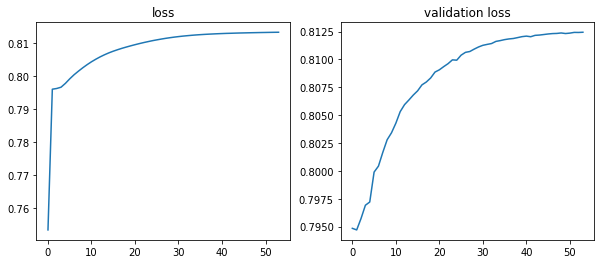

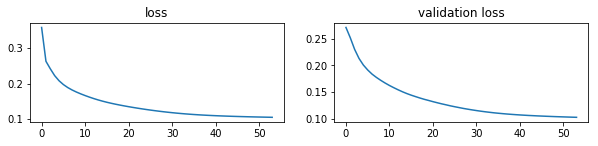

In [38]:
plot_training_history(autoencoder)

#### Evaluation on Model 2  
1 hidden layer ; hidden size = input size  
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
=================================================================
Total params: 615,440
Trainable params: 615,440
Non-trainable params: 0
_________________________________________________________________
```

Training history


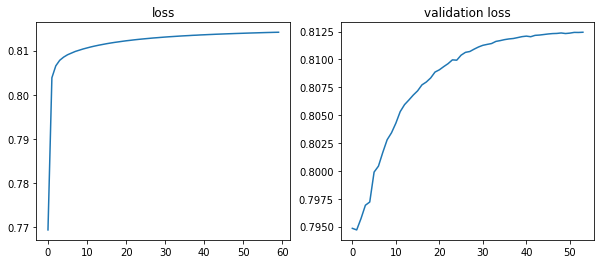

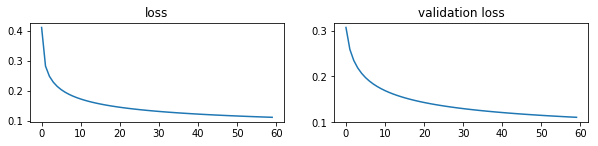

In [40]:
plot_training_history(autoencoder2)

#### Evaluation on Model 3  
1 hidden layer ; hidden size 2 times as input size   
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1568)              1230880   
_________________________________________________________________
dense_5 (Dense)              (None, 784)               1230096   
=================================================================
Total params: 2,460,976
Trainable params: 2,460,976
Non-trainable params: 0
_________________________________________________________________

```

Training history


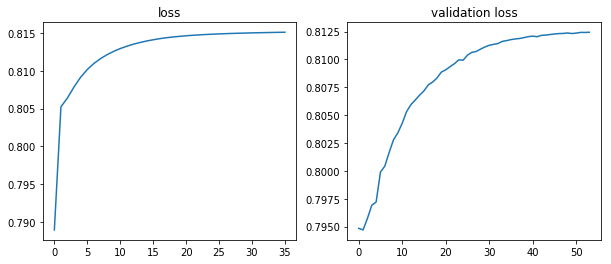

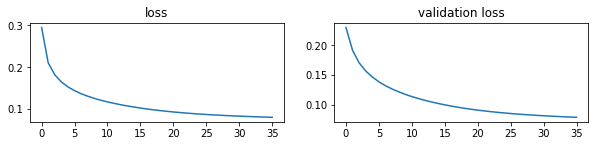

In [41]:
plot_training_history(autoencoder3)

#### Evaluation on Model 4  
3 hidden layer ; hidden size = |input|/2, |input|/4, |input|/2 in order.  
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 146)               57378     
_________________________________________________________________
dense_12 (Dense)             (None, 392)               57624     
_________________________________________________________________
dense_13 (Dense)             (None, 784)               308112    
=================================================================
Total params: 730,834
Trainable params: 730,834
Non-trainable params: 0
_________________________________________________________________

```

Training history


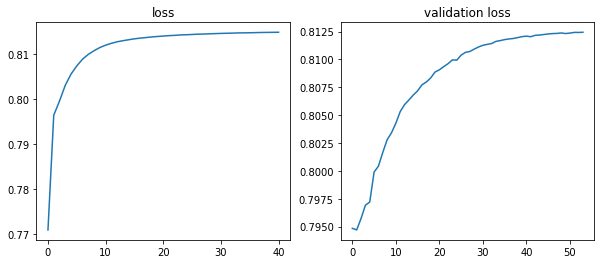

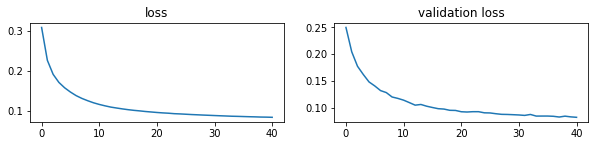

In [45]:
plot_training_history(autoencoder4)

### Example of image

In [49]:
# finding all the digits in test data
pointer = []
mem = []
for i in range(100):
    if y_test[i] not in mem:
        mem.append(y_test[i])
        pointer.append(i)

In [50]:
pointer

[0, 1, 2, 3, 4, 7, 8, 11, 18, 61]

In [52]:
def show_imgs(x_test, pointer, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[pointer[i]].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[pointer[i]].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

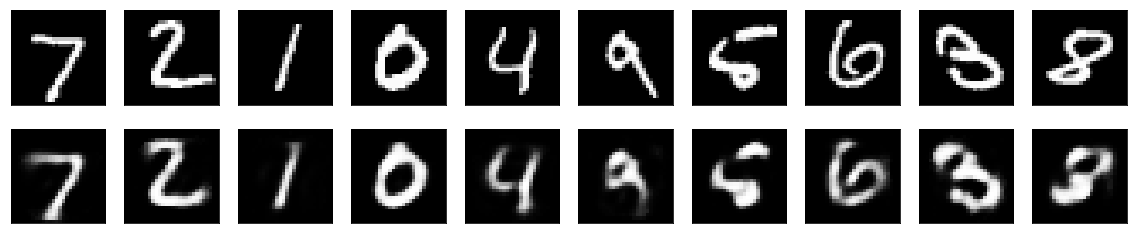

In [54]:
# Example on Model1
decoded_imgs = autoencoder.predict(x_test)
show_imgs(x_test,pointer,decoded_imgs)

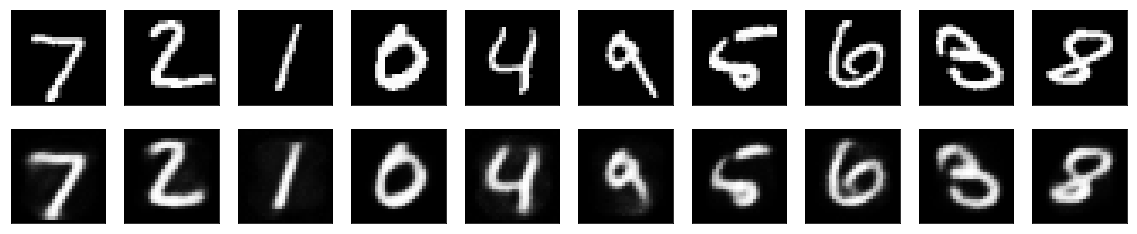

In [61]:
# Example on Model2
decoded_imgs2 = autoencoder2.predict(x_test)
show_imgs(x_test,pointer,decoded_imgs2)

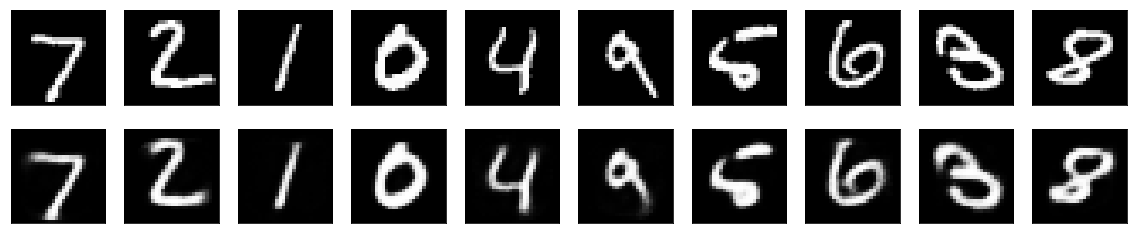

In [59]:
# Example on Model3
decoded_imgs3 = autoencoder3.predict(x_test)
show_imgs(x_test,pointer,decoded_imgs3)

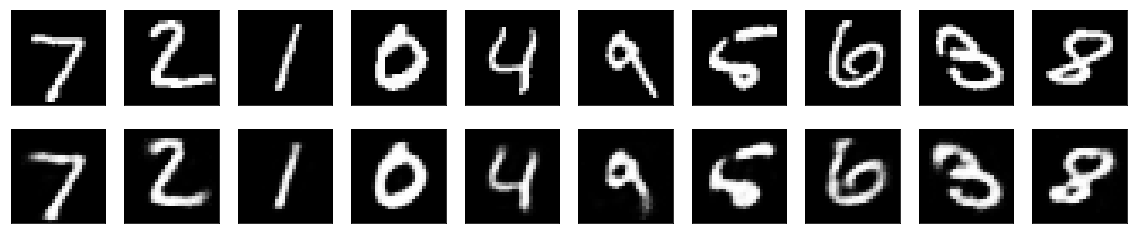

In [60]:
# Example on Model4
decoded_imgs4 = autoencoder4.predict(x_test)
show_imgs(x_test,pointer,decoded_imgs4)

## Summary  
ACC and Loss on all of the model  
1. Train data (loss: 0.1046 acc: 0.8233) Validate data (loss: 0.1030 acc:0.8124)
2. Train data (loss: 0.1121 acc: 0.8142) Validate data (loss: 0.1109 acc:0.8132)
3. Train data (loss: 0.0806 acc: 0.8151) Validate data (loss: 0.0795 acc:0.8142)
4. Train data (loss: 0.0820 acc: 0.8145) Validate data (loss: 0.0817 acc:0.8139)  


If we only look at the images that the autoencoder generate, model1 is the worst since the hidden layer size in it is set to 32 which is very small compare to the input size.  
For the other model, the acc is pretty much the same on the test set. But from the image, Model 3 and 4 are more close to the original one than the model 2. And the predict image on the model 3 and 4 are quite the same, I can' tell the difference much from it. 
